In [1]:
# Regressione ridge (Regolarizzazione di Tichonov)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as lm

# Se due predittori sono molto correlati la OLS può produrre coefficienti molto grandi
# Per imporre una penalità si usa la regressione ridge
# Con alpha=0 è uguale alla OLS
# Con alpha elevato la penalità è elevata

In [2]:
sap = pd.read_csv("./Data/^GSPC.csv", index_col="Date", parse_dates=True)
sap = sap[-20:]
sap.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-20,2431.939941,2453.010010,2295.560059,2304.919922,2304.919922,9044690000
2020-03-23,2290.709961,2300.729980,2191.860107,2237.399902,2237.399902,7402180000
2020-03-24,2344.439941,2449.709961,2344.439941,2447.330078,2447.330078,7547350000
2020-03-25,2457.770020,2571.419922,2407.530029,2475.560059,2475.560059,8285670000
2020-03-26,2501.290039,2637.010010,2500.719971,2630.070068,2630.070068,7753160000


In [3]:
# Preparazione modello

# Le date vanno cambiate con numeri per poter funzionare nel modello e l'array va verticale
x = np.array([x.toordinal() for x in sap.index])[:, np.newaxis]
# Metodo che conosco, azzero l'indice e prendo i suoi valori
x = sap.reset_index().index.values
# Modifico l'array per renderlo verticale
x = x.reshape(-1, 1)
# La serie va bene per il parametro y ma devo cambiare gli indici
y = sap.reset_index()["Close"]
# Effettuo il training
model = lm.Ridge(alpha=.5).fit(x,y)

In [4]:
# Predizione valori
yp = model.predict(x)

In [5]:
# Valutazione modello
model_score = model.score(x, y)
model_coef = model.coef_
model_intercept = model.intercept_

Text(2020-03-20 00:00:00, 2850, 'Score=0.805, Coeff=26.820, Intercept=2358.313')

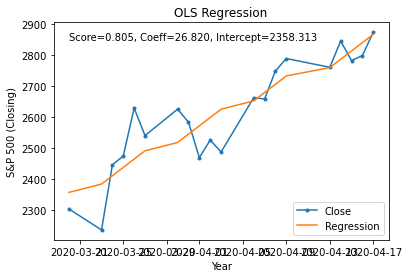

In [6]:
# Tracciamento grafico
plt.title("OLS Regression")
plt.xlabel("Year")
plt.ylabel("S&P 500 (Closing)")
plt.plot(sap.index, y, marker=".", label="Close")
plt.plot(sap.index, yp, label="Regression")
plt.legend(loc="lower right")
plt.annotate("Score={0:.3f}, Coeff={1:.3f}, Intercept={2:.3f}".format(model_score, model_coef[0], model_intercept), xy=(pd.to_datetime("2020-03-20"), 2850))

In [7]:
# Previsioni future usando andando avanti di 10 previsioni
xf = np.arange(x[-1], x[-1]+10).reshape(-1,1)
yf = model.predict(xf)

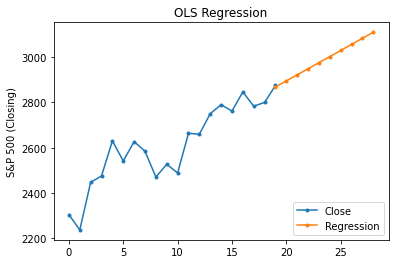

In [8]:
# Tracciamento grafico
plt.title("OLS Regression")
plt.ylabel("S&P 500 (Closing)")
plt.plot(x, y, marker=".", label="Close")
plt.plot(xf, yf, marker=".", label="Regression")
plt.legend(loc="lower right")
